# The Sparks Foundation - Data Science & Business Analytics 
#  GRIPMAY21

## NAME : Chaitali Dhawale

## TASK 1 - Prediction using Supervised Machine Learning

### Objective : Predict the percentage of an student based on the no. of study hours.

## Importing the libraries

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [12]:
# Reading data from remote link
url="http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data Exploration

In [13]:
data.shape    #to find the number of rows and columns 

(25, 2)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [15]:
# now we will check if our dataset contains null or missings values  
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [17]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

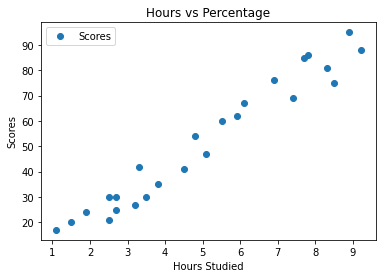

In [20]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores')  
plt.show()

#### From the above plot,we can observe that there is a Linear Relationship between the Hours studied and the Scores obtained by the students.

In [22]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Data Preparation

Divide the data into "attributes" (inputs) and "labels" (outputs)

In [21]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values

In [23]:
# Splitting the data into training and testing data

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

## Training the Algorithm using Simple Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete!")

Training complete!


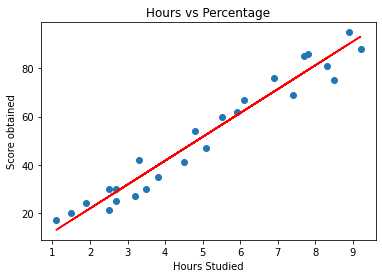

In [28]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X,y)
plt.plot(X, line, color="red")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')  
plt.ylabel("Score obtained") 
plt.show()

## Making Predictions

In [29]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [30]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Problem Statement : Predict the score if a student studies for 9.25 hrs/ day?

In [31]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("The predicted score if a student studies for",hours,"hours is",own_pred[0])

The predicted score if a student studies for 9.25 hours is 93.69173248737538


## Evaluating the model

Mean Absolute Error is used to evaluate the performance of our algorithm. 

In [32]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
